# Automation of Spotify playlist creation using high dimensional data with K-means clustering algorithm
The goal of this project is to use a clustering algorithm to break down a large playlist into smaller ones.
You can fiend the explanation of all features used in this dataset in the following link: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import time 

# K_Means Clustering Algorithm Implementation From Scratch
K-Means is the most popular clustering algorithm. It uses an iterative technique to group unlabeled data into K clusters based on cluster centers (centroids). The data in each cluster are chosen such that their average distance to their respective centroid is minimized.

# first step: Randomly choosing the K centroids for the initial clusters from the dataset.

In [2]:
def kMeans_init_centroids(X, K):
    rand_idx = np.random.permutation(X.shape[0])
    init_centroids = X[rand_idx[:K]]
    return np.array(init_centroids)

# Second step: Assigning each data point to their nearest centroid.

In [3]:
def assigning_points_to_centroids(x,centroids):
    m,n = x.shape
    k = centroids.shape[0]
    index = []
    for i in range(m):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(x[i]-centroids[j]))
        index.append(np.argmin(distance))
    return np.array(index)

# Third step: Updating centroid locations based on the locations of the data points

In [4]:
def recomputing_centroids(x,index,k):
    n = x.shape[1]
    new_centroids = []
    for j in range(k):
        points_related_to_cluster_j = x[index == j]
        new_centroids.append(np.mean(points_related_to_cluster_j, axis = 0)) 
    return np.array(new_centroids)

# Running the algorithm(repeting [fist & second] step n times ) 

In [5]:
def run_kMeans(X, initial_centroids, max_iters):
    k = initial_centroids.shape[0]
    z = initial_centroids
    for i in range(max_iters):
        indx = assigning_points_to_centroids(X, z)
        centroids = recomputing_centroids(X,indx,k)
        z = centroids
        if i%5 == 0:
            print('iteration{}/{} ====>{} \n'.format(i,max_iters,list(z)))
    return np.array(centroids),np.array(indx)

# Loading Manipulating and Preprocessing Data

In [6]:
#loading data set
data = pd.read_csv("SpotifyFeatures.csv")

In [7]:
data.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [10]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

# Frequency distribution for some features

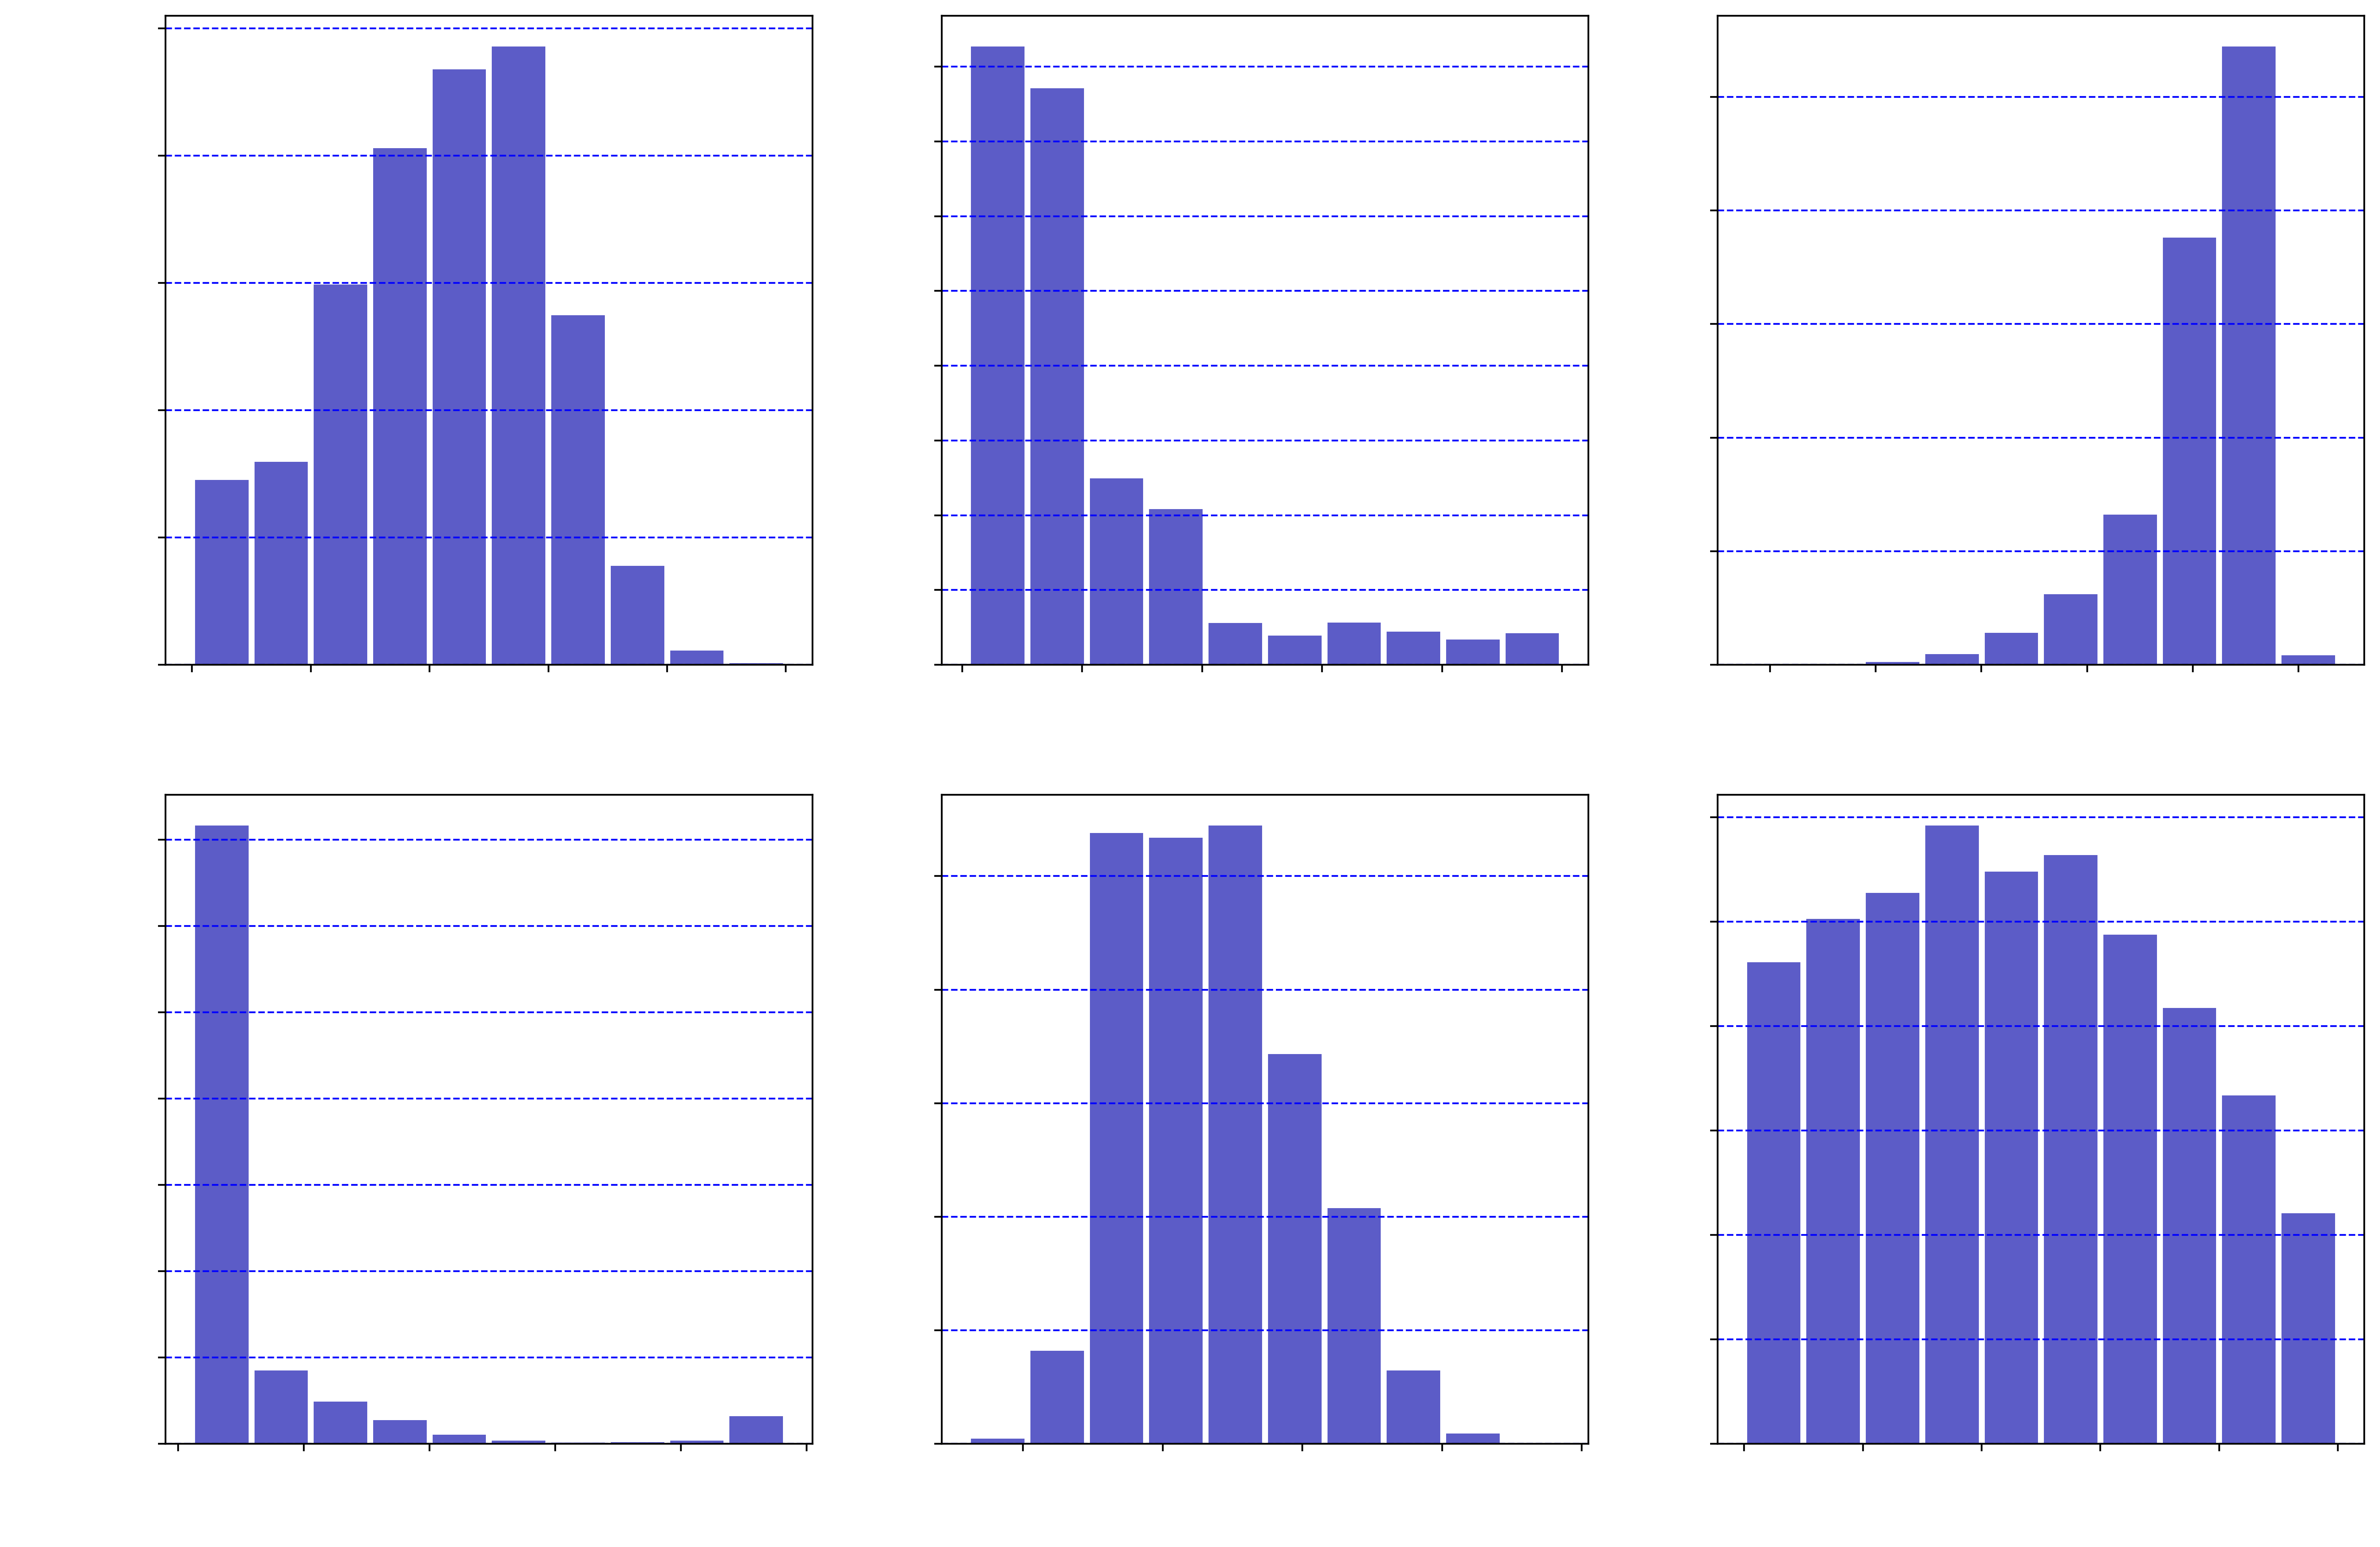

In [11]:

features =  ['popularity', 'liveness', 'loudness','speechiness','tempo', 'valence']
l = len(features)
plt.figure(figsize=(18,12),dpi = 400)
for i in range (l):
    plt.subplot(2,3,i+1)
    plt.hist(data[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20,color = "w")
    if i == 0 or i == 3:
        plt.ylabel("Frequancy",size = 20,color = "w")
        
    plt.xticks(c = "w")
    plt.yticks(c = "w")
    plt.grid(axis = "y" , linestyle = "--",color = "b")

In [12]:
# Grouping data by gener then count track_id in each group
df0 = pd.DataFrame(data.groupby(data["genre"]).count()["track_id"]).reset_index()
#sorting values in
df0 = df0.sort_values(by="track_id",ascending=False)

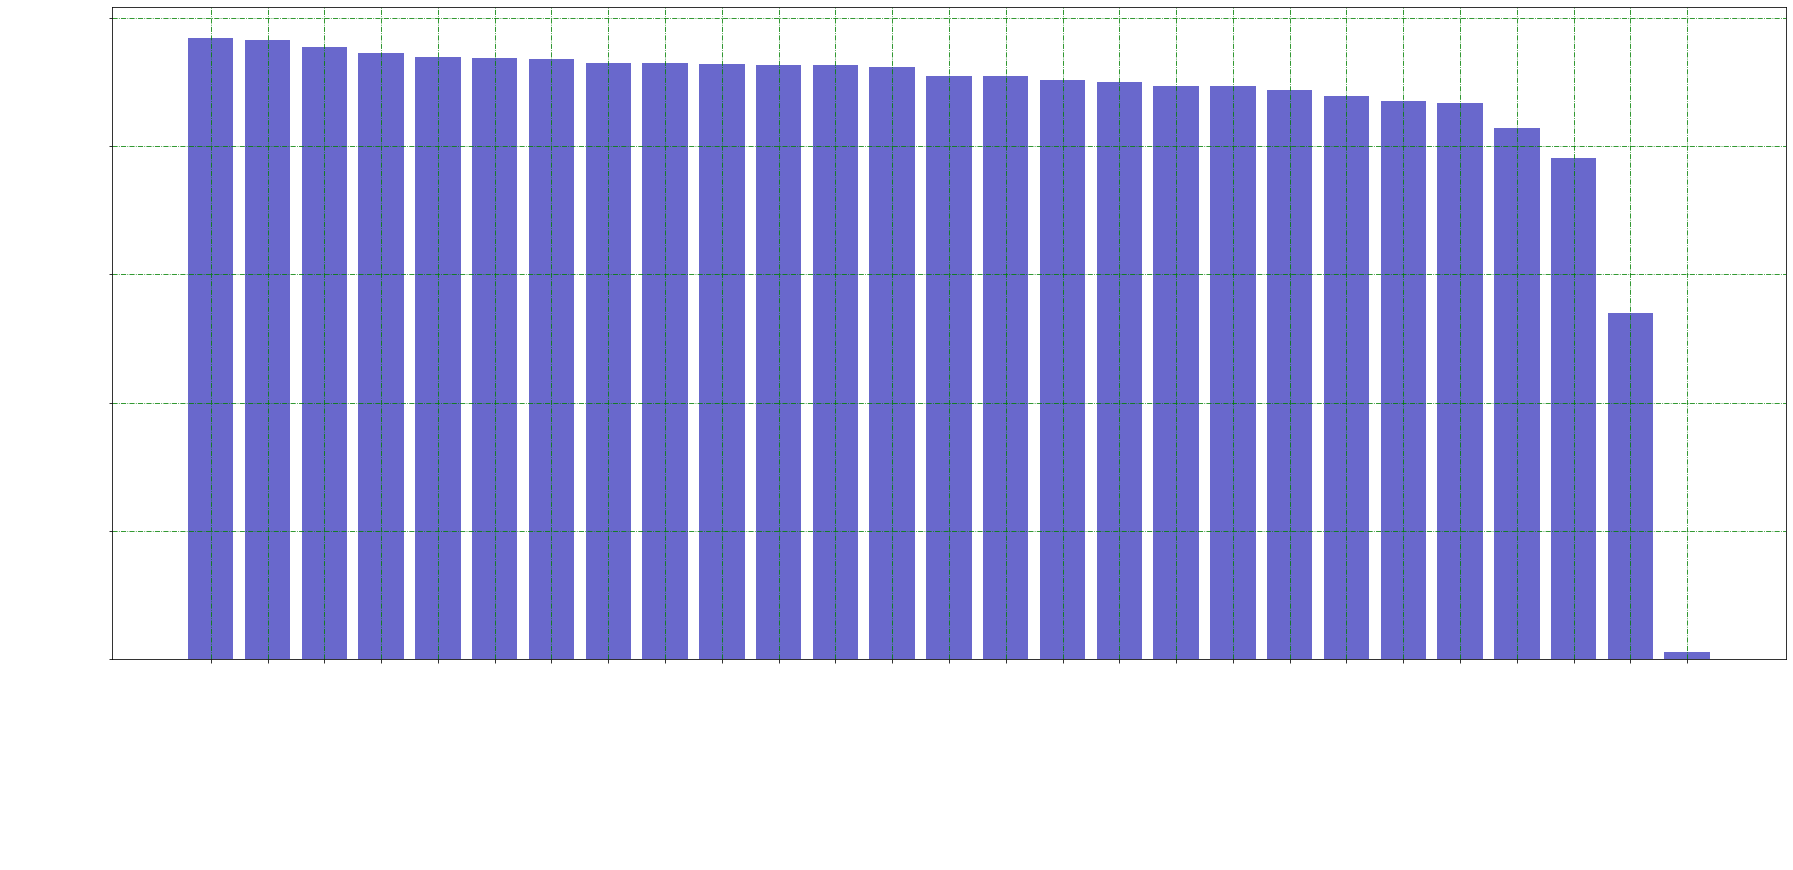

In [13]:
# Plotting no.of tracks in each category
plt.figure(figsize= (30,12))
plt.bar(df0["genre"],df0["track_id"],color = '#0504aa',alpha = 0.6)
plt.xlabel("Genre",c = "w",size = 30)
plt.ylabel("Num_of_Tracks",c = "w",size = 30)
plt.xticks(c = "w",size = 20,rotation='vertical')
plt.yticks(c = "w",size = 20)
plt.grid(linestyle = '-.',c = "g")
plt.show()

In [14]:
df1 = data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'key', "time_signature"])
df1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,Major,0.0316,115.542,0.962
232721,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,Minor,0.0337,113.830,0.969
232722,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,Major,0.1480,84.135,0.813
232723,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,Major,0.1460,100.031,0.489


In [15]:
#data preprocessing 
df1.loc[df1["mode"] == "Major" ,"mode"] = 1
df1.loc[df1["mode"] == "Minor" ,"mode"] = 0
x = np.array(df1)

In [16]:
#scaling features 
df1["popularity"] = df1["popularity"] / max(df1["popularity"])
df1["duration_ms"] = df1["duration_ms"] /max(df1["duration_ms"])
df1["tempo"] = df1["tempo"] /max(df1["tempo"])
df1["loudness"] = df1["loudness"] /max(df1["loudness"])

# Choosing the proper number of clusters using elbow method

In [17]:
start_1 = time.time()
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
end_1 = time.time()
print("Running Time: {} s".format((end_1-start_1)))

Running Time: 183.51946997642517 s


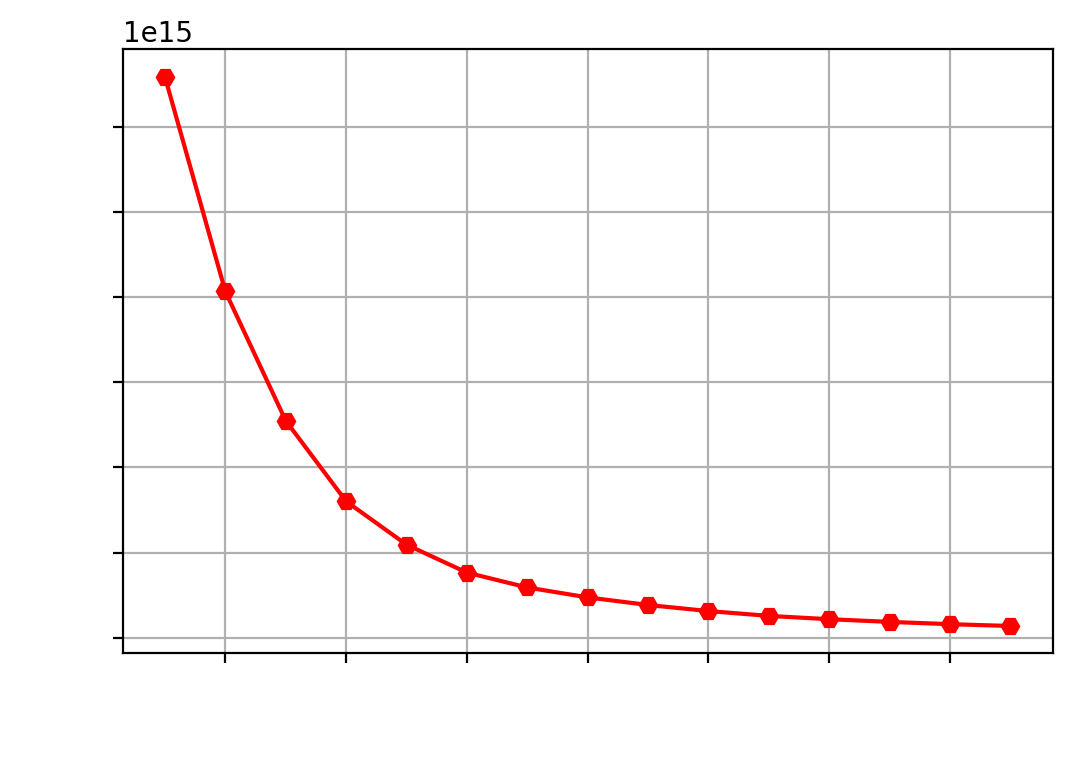

In [18]:
plt.figure(dpi = 200)
plt.plot(np.arange(1,16),wcss,marker = "H",color = "r")
plt.xlabel("No.of_clusters",c = "w")
plt.ylabel("WCSS",c = "w")
plt.xticks(c = "w")
plt.yticks(c = "w")
plt.grid()
plt.show()

In [19]:
initial_centroids = kMeans_init_centroids(x, 10)
print('initial centroids ====>\n{} \n'.format(initial_centroids))

initial centroids ====>
[[77 0.202 0.759 211067 0.699 0.000131 0.443 -5.745 0 0.0307 92.96 0.907]
 [45 0.269 0.578 240573 0.717 0.0 0.211 -5.524 1 0.183 172.098 0.358]
 [49 0.111 0.589 199147 0.723 0.0 0.0762 -5.365 1 0.0936 161.071 0.506]
 [48 3.72e-05 0.509 202587 0.855 5.87e-05 0.0808 -4.567 1 0.046 160.051
  0.804]
 [40 0.961 0.536 156733 0.0431 6.08e-05 0.521 -16.823 1 0.0382 121.168
  0.412]
 [48 0.0228 0.642 261093 0.834 0.0 0.126 -5.281 0 0.0674 79.982 0.58]
 [46 0.613 0.562 196653 0.61 0.00143 0.103 -6.44 1 0.0432 83.594 0.425]
 [25 0.000622 0.453 164360 0.931 0.0465 0.163 -2.477 1 0.0506 123.611
  0.652]
 [61 0.97 0.498 250000 0.156 0.000546 0.139 -16.582 0 0.0653 124.215
  0.0595]
 [28 0.283 0.706 269187 0.586 0.646 0.0564 -9.445 1 0.0503 87.493 0.868]] 



# Running the Algorithm 
after running the algoritm we will get the final centroides and an index for each example in input dataset which refers to the cluster to which this example belong. 

In [20]:
start_2 = time.time()
centroids,idx = run_kMeans(x, initial_centroids,21)
end_2 = time.time()
print("Running Time:{} s".format((end_2-start_2)))

iteration0/21 ====>[array([46.21696600384862, 0.27473454191468866, 0.5912240987812751,
       216261.92777421424, 0.6350775160359166, 0.08029558416356641,
       0.19673077934573346, -7.780651347017401, 0.636241180243746,
       0.10292706221937245, 119.62953441308535, 0.49189215522770635],
      dtype=object), array([45.39284558691354, 0.2839018450670495, 0.5802708214991891,
       235193.02480675894, 0.6244489095811612, 0.0890677493287795,
       0.20047479777098645, -8.027636994427505, 0.6385403559230631,
       0.10379916591767127, 119.7925271256527, 0.47016218227575063],
      dtype=object), array([46.0622494197088, 0.29532512952732665, 0.5894377927832877,
       199413.823591475, 0.6268632306393773, 0.08033368025532822,
       0.1923423929098964, -7.925768305549697, 0.6281916016037139,
       0.103467229373286, 120.00391327284201, 0.5007761342055276],
      dtype=object), array([45.69509906152242, 0.2882647720271117, 0.5887190615224193,
       203885.05161626695, 0.62741275703858

iteration15/21 ====>[array([45.17078175069737, 0.28524716352859997, 0.577161143002046,
       238233.29709292942, 0.6236341759457671, 0.09319490883993825,
       0.20040845148350514, -8.07365730686773, 0.6385872697512507,
       0.10271100122184636, 119.7621361320505, 0.4679158839938175],
      dtype=object), array([42.6827744904668, 0.32889967025489153, 0.5487705987963336,
       279752.5553026855, 0.5851148470136004, 0.1365468023817834,
       0.20804160724219625, -9.07128230415209, 0.6425428614777727,
       0.10316791331613924, 117.67653760178065, 0.42735699691498436],
      dtype=object), array([44.621470669916995, 0.3192348460400498, 0.5893247477396826,
       187955.21155923104, 0.6068283172771313, 0.09204446805319871,
       0.2021024840312281, -8.389749652852798, 0.6513099021816274,
       0.11412572900916514, 119.13153102724756, 0.501496753787761],
      dtype=object), array([46.14800406814137, 0.2797436130147458, 0.5913678591406087,
       211352.50869565218, 0.6322729346554

In [21]:
print(idx.shape)
idx[30:100]


(232725,)


array([3, 4, 7, 6, 0, 6, 3, 3, 7, 4, 2, 2, 6, 7, 8, 4, 2, 1, 6, 3, 7, 4,
       4, 2, 7, 4, 3, 7, 4, 8, 6, 2, 7, 2, 1, 0, 2, 7, 6, 3, 4, 7, 6, 4,
       8, 0, 7, 2, 5, 2, 3, 4, 1, 2, 7, 4, 0, 8, 0, 1, 0, 1, 6, 7, 7, 0,
       9, 6, 4, 6], dtype=int64)

In [22]:
# Creating playlists based on output indexes generated by K_Mean Algorithm
Cluster_No_i = []
for i in range(10):
    x = pd.DataFrame(data.iloc[idx == i ] )
    y = x.drop(columns=['popularity','acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness',
                       'liveness', 'loudness','speechiness', 'tempo', 'valence'])
    Cluster_No_i.append(y)

In [23]:
# Playlist no.1
Cluster_No_i[0]

,genre,artist_name,track_name,track_id,key,mode,time_signature
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,F#,Major,4/4
34,Movie,Chorus,Ambarsare Diyan Warhiyan,1Zj5XBiUaHTkkBJ2nET477,E,Minor,4/4
65,Movie,Karine Costa,Super Insomniaque,2WwJlG8fczrLwRAxsnXRl7,B,Minor,4/4
75,Movie,Jean Claude Corbel,Les poissons voyageurs,2jBp52nfXVpHbt9dqf0cSs,G,Major,4/4
86,Movie,Chorus,Thandeye Oh,321MDop1sPmNMO0UQE4EcJ,G,Minor,4/4
...,...,...,...,...,...,...,...
232698,Soul,Donell Jones,You Know That I Love You,5QiTs0egWAq0k2O8HWKoEP,F#,Major,4/4
232701,Soul,Kem,Why Would You Stay - Main,3XC07S7gOwwKNFX3PPqjml,B,Major,4/4
232709,Soul,Joss Stone,Some Kind Of Wonderful,1sQMwuozNCmF811OgjTWIA,C,Major,4/4
232711,Soul,The Knocks,Comfortable (feat. X Ambassadors),6KkLg2UJB4sUIbtDyc8Esu,A#,Minor,4/4


In [24]:
# Playlist no.5
Cluster_No_i[4]

,genre,artist_name,track_name,track_id,key,mode,time_signature
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
23,Movie,Jean Claude Corbel,Pourquoi aller plus loin ?,15CpJP0LXchBUjpB8RKh8m,C,Major,4/4
31,Movie,Martin & les fées,Une journée d'école qui s'achève (par Véroniqu...,1LFky4DBeOLzVWbg0avgod,B,Minor,4/4
39,Movie,Larry Groce,"Sailing, Sailing",1jyknwZYTEEj1TCUozUbCi,G,Major,4/4
45,Movie,Ken Page,Penn Station - Seesaw,1qda3iYG5DlQJeY5BpSmpe,C,Major,4/4
...,...,...,...,...,...,...,...
232047,Soul,Jorja Smith,Carry Me Home (Interlude),6lMMzrM5BOVSlJ1DbnzWjr,B,Minor,3/4
232157,Soul,Quentin Miller,"""Proper Freestyle"".",5okpwK0iFJ2rh92GkFNj77,D,Minor,4/4
232355,Soul,Erykah Badu,Hi,5GsT7Z8h4PL3TPtWm3Maki,F#,Minor,3/4
232406,Soul,Hiatus Kaiyote,Choose Your Weapon,3NqwLwpzbpyvXB2wJE0Oe6,F,Major,4/4


In [25]:
# Playlist no.10
Cluster_No_i[9]

,genre,artist_name,track_name,track_id,key,mode,time_signature
15,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 6,0uWUjxM7oDPKpb3T2y3oZm,G#,Major,3/4
96,Movie,Chorus,Koti Chennaya(Vol.1 &amp; 2),3NXlNZSmjO3DsJ3DQuyU8e,F,Major,4/4
114,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 5,3kQkcxkRneREJohv69y6hD,F,Minor,3/4
369,Movie,Michel Roux,L'aiguille creuse - Partie 1,06UFQjrvxqQe6EkHxcu9BX,G#,Major,3/4
450,Movie,Chorus,Sri Sankashta Chathurthi Vratha,3ZsulgbSF46mgpmuZtSixp,D,Major,4/4
...,...,...,...,...,...,...,...
219057,World,Jamie Llewellyn,Nature Sounds for Sleep: Crackling Log Fire wi...,40duG6erWyOVizxE9P8KqV,B,Minor,1/4
220830,World,Steve Reich,Music for 18 Musicians,2hmdWr3UjU3aXS4KjhQgex,F#,Minor,3/4
221109,World,Brian Eno,I Dormienti,0bZpZXnlkmBCJGh9EhEVAX,C#,Major,4/4
221555,World,Pharoah Sanders,The Creator Has A Master Plan,0VtW9kU97Le5SQ0ml4nFzO,D#,Major,4/4
